<a href="https://colab.research.google.com/github/prathamesh-kandpal/Sentiment_Analysis_tweets/blob/main/NLP_Course_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tweepy: tweepy is the python client for the official Twitter API.


In [ ]:
pip install tweepy


In [ ]:
import matplotlib.pyplot as plt

TextBlob: textblob is the python library for processing textual data.


In [ ]:
from textblob import TextBlob

Enter Text to be classified:  Covid-19
Positive tweets percentage: 24.444444444444443 %
Negative tweets percentage: 12.222222222222221 %
Neutral tweets percentage: 63.333333333333336 %


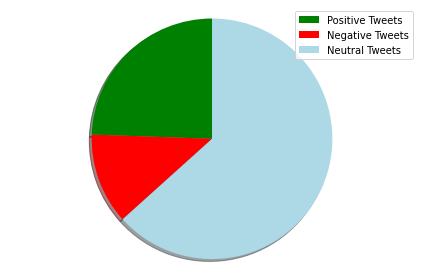



 Positive tweets:
RT @NYSCAA: Census Engagement for Front-line Staff Webinar

2020 Census data will affect how much funding communities will receive. With th…
RT @jack_turban: Woah - it’s not every day major medical organizations publicly condemn specific physicians by name.
https://t.co/OoNfqpGeJi
RT @WoodmenLife: Thanks to the enormous generosity of the WoodmenLife family and others across the nation, we were able to raise $1,042,340…
@seopng YES HYUNJIN UNDERCUT BE SAVING US FROM COVID 19 I THINK SUPERIOR
RT @CharlieDaniels: It is overly apparent that The Chinese Communist Government and the World Health Organization combined in suppressing C…
#Analysis | " Players are anxious; all events stand cancelled; there are huge financial losses; and the future is u… https://t.co/GVPVFxMeRD
RT @MFaarees_: gaskia dole ma wasu suce babu COVID-19 a Nigeria, people from isolation centers are busy snapping, taking videos and posting…
RT @VanityTrust: If you personally know someone who has teste

In [ ]:
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
 
class TwitterClient(object):
    '''
    Twitter Class for sentiment analysis.
    '''
    def __init__(self):
        '''
        Class constructor or initialization method.
        '''
        # keys and tokens from the Twitter Dev Console
        consumer_key = 'yDlvVPn2TwAGUJ7QaJWS1i3Rr'
        consumer_secret = 'XAuGWmuBA4KZpgaSEGunjbhoqC4WIdWQoIFwACjImG2CBm3g4j'
        access_token = '4700090913-9SZmzyrPTHuDtD2nx0e2XDxxovXmIhSnSfvJp0H'
        access_token_secret = 'rLRBDppdxbkXHO3Pjeoso3JS7OMOBTZuNb5V3T6AM0ge4'
 
        # attempt authentication
        try:
            # create OAuthHandler object
            self.auth = OAuthHandler(consumer_key, consumer_secret)
            # set access token and secret
            self.auth.set_access_token(access_token, access_token_secret)
            # create tweepy API object to fetch tweets
            self.api = tweepy.API(self.auth)
        except:
            print("Error: Authentication Failed")
 
    def clean_tweet(self, tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
 
    def get_tweet_sentiment(self, tweet):
        '''
        Utility function to classify sentiment of passed tweet
        using textblob's sentiment method
        '''
        # create TextBlob object of passed tweet text
        analysis = TextBlob(self.clean_tweet(tweet))
        # set sentiment
        if analysis.sentiment.polarity > 0:
            return 'positive'
        elif analysis.sentiment.polarity == 0:
            return 'neutral'
        else:
            return 'negative'
 
    def get_tweets(self, query, count = 10):
        '''
        Main function to fetch tweets and parse them.
        '''
        # empty list to store parsed tweets
        tweets = []
 
        try:
            # call twitter api to fetch tweets
            fetched_tweets = self.api.search(q = query, count = count)
 
            # parsing tweets one by one
            for tweet in fetched_tweets:
                # empty dictionary to store required params of a tweet
                parsed_tweet = {}
 
                # saving text of tweet
                parsed_tweet['text'] = tweet.text
                # saving sentiment of tweet
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text)
 
                # appending parsed tweet to tweets list
                if tweet.retweet_count > 0:
                    # if tweet has retweets, ensure that it is appended only once
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                else:
                    tweets.append(parsed_tweet)
 
            # return parsed tweets
            return tweets
 
        except tweepy.TweepError as e:
            # print error (if any)
            print("Error : " + str(e))
 
def main():
    # creating object of TwitterClient Class
    api = TwitterClient()
    # calling function to get tweets
    s = str(input("Enter Text to be classified:  "))
    tweets = api.get_tweets(query = s, count = 200)
 
    # picking positive tweets from tweets
    ptweets = [tweet for tweet  in tweets if tweet['sentiment'] == 'positive']
    # percentage of positive tweets
    print("Positive tweets percentage: {} %".format(100*len(ptweets)/len(tweets)))
    p_per= format(100*len(ptweets)/len(tweets))
    # picking negative tweets from tweets
    ntweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']
    # picking negative tweets from tweets
    neutral_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
    # percentage of negative tweets
    print("Negative tweets percentage: {} %".format(100*len(ntweets)/len(tweets)))
    n_per= format(100*len(ntweets)/len(tweets))
    # percentage of neutral tweets
    print("Neutral tweets percentage: {} %".format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets)))
    neu_per= format(100*(len(tweets) - len(ntweets) - len(ptweets))/len(tweets))
    # prinitng pie-chart
    labels = ['Positive Tweets', 'Negative Tweets', 'Neutral Tweets']
    sizes = [p_per, n_per, neu_per]
    colors = ['green', 'red', 'lightblue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


    # printing first 5 positive tweets
    print("\n\n Positive tweets:")
    for tweet in ptweets[:1000]:
        print(tweet['text'])
 
    # printing first 5 negative tweets
    print("\n\n Negative tweets:")
    for tweet in ntweets[:1000]:
        print(tweet['text'])
    # printing first 5 negative tweets
    print("\n\n Neutral tweets:")
    for tweet in neutral_tweets[:1000]:
        print(tweet['text'])
 
if __name__ == "__main__":
    # calling main function
    main()